<a href="https://colab.research.google.com/github/pdesai27/DAB-103/blob/main/CountryMigration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SCC Docs/Courses/DAB 103 Analytics Tools & Decision Making/DAB 103 Project/Data/CSV_ Country Migration.csv")

In [ ]:
df.head(5)
df.tail(5)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
4143,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,za,South Africa,-30.559482,22.937506,Upper Middle Income,Sub-Saharan Africa,-2.98,-11.79,-9.10,-12.08,-20.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4144,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,-2.50,-2.49,-2.21,-1.68,-3.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4145,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,gb,United Kingdom,55.378051,-3.435973,High Income,Europe & Central Asia,3.91,4.66,0.74,-0.66,-1.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4146,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,us,United States,37.090240,-95.712891,High Income,North America,38.60,37.76,10.09,6.06,5.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4147,zw,Zimbabwe,-19.015438,29.154857,Low Income,Sub-Saharan Africa,zm,Zambia,-13.133897,27.849332,Lower Middle Income,Sub-Saharan Africa,0.70,2.47,0.83,1.21,0.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking the missing values
df.info()
df.isnull().sum()

# Checking the shape of data
df.shape

# Checking the data types
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

base_country_code            object
base_country_name            object
base_lat                    float64
base_long                   float64
base_country_wb_income       object
base_country_wb_region       object
target_country_code          object
target_country_name          object
target_lat                  float64
target_long                 float64
target_country_wb_income     object
target_country_wb_region     object
net_per_10K_2015            float64
net_per_10K_2016            float64
net_per_10K_2017            float64
net_per_10K_2018            float64
net_per_10K_2019            float64
Unnamed: 17                 float64
Unnamed: 18                 float64
Unnamed: 19                 float64
Unnamed: 20                 float64
Unnamed: 21                 float64
Unnamed: 22                 float64
Unnamed: 23                 float64
Unnamed: 24                 float64
Unnamed: 25                 float64
dtype: object

In [ ]:
# Extract specific cells
df.values[100][1]
df.values[100][8]

-0.789275

In [ ]:
# Extract column names
df.columns

Index(['base_country_code', 'base_country_name', 'base_lat', 'base_long',
       'base_country_wb_income', 'base_country_wb_region',
       'target_country_code', 'target_country_name', 'target_lat',
       'target_long', 'target_country_wb_income', 'target_country_wb_region',
       'net_per_10K_2015', 'net_per_10K_2016', 'net_per_10K_2017',
       'net_per_10K_2018', 'net_per_10K_2019', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

# Cleaning dataset

In [ ]:
# Selecting required columns. Drop empty columns from 18 to 26.
data = df.iloc[:,0:17]

# Checking the shape of data
data.shape

# Describing the data
data.describe()
data.describe(include='all')
data.describe().iloc[0,1]

,base_lat,base_long,target_lat,target_long,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,28.418022,21.698305,28.418022,21.698305,0.461757,0.150248,-0.080272,-0.040591,-0.022743
std,25.086012,61.937381,25.086012,61.937381,5.006530,4.201118,3.203092,3.593876,3.633247
min,-40.900557,-106.346771,-40.900557,-106.346771,-37.010000,-40.890000,-43.660000,-56.220000,-50.330000
25%,14.058324,-3.435973,14.058324,-3.435973,-0.150000,-0.190000,-0.210000,-0.210000,-0.210000
50%,35.861660,19.145136,35.861660,19.145136,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.516231,53.688046,47.516231,53.688046,0.240000,0.220000,0.160000,0.170000,0.180000
max,64.963051,179.414413,64.963051,179.414413,150.680000,124.480000,87.000000,91.410000,87.710000


In [ ]:
# Checking few random things
data.nunique()
data.median()

base_lat            35.861660
base_long           19.145136
target_lat          35.861660
target_long         19.145136
net_per_10K_2015     0.000000
net_per_10K_2016     0.000000
net_per_10K_2017     0.000000
net_per_10K_2018     0.000000
net_per_10K_2019     0.000000
dtype: float64

In [ ]:
# Checking the number of countries and regions
data.base_country_name.value_counts()
data.target_country_name.value_counts()

data.base_country_wb_region.value_counts()
data.target_country_wb_region.value_counts()

Europe & Central Asia         1696
East Asia & Pacific            665
Middle East & North Africa     550
Latin America & Caribbean      415
Sub-Saharan Africa             369
North America                  252
South Asia                     201
Name: target_country_wb_region, dtype: int64

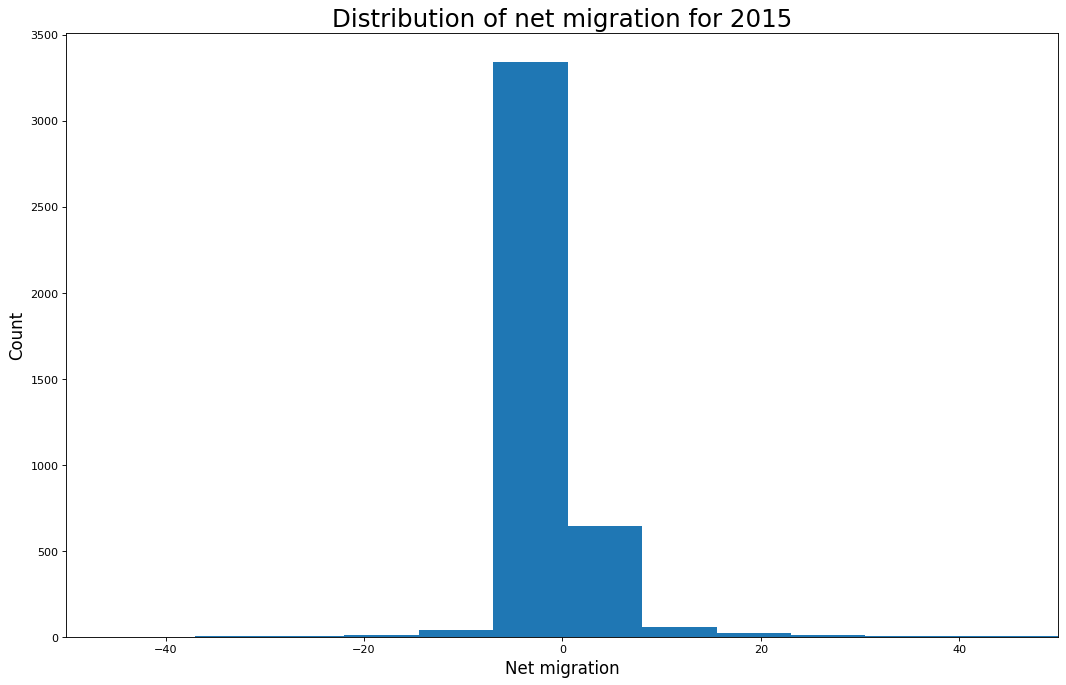

In [ ]:
# Distribution of net migration for 2015
plt.figure(figsize=(16,10), dpi= 80)
plt.hist(x='net_per_10K_2015', data=data, bins=25)
plt.xlim(-50,50)


# Decoration
plt.xlabel('Net migration', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Distribution of net migration for 2015', fontsize=22)
plt.show()

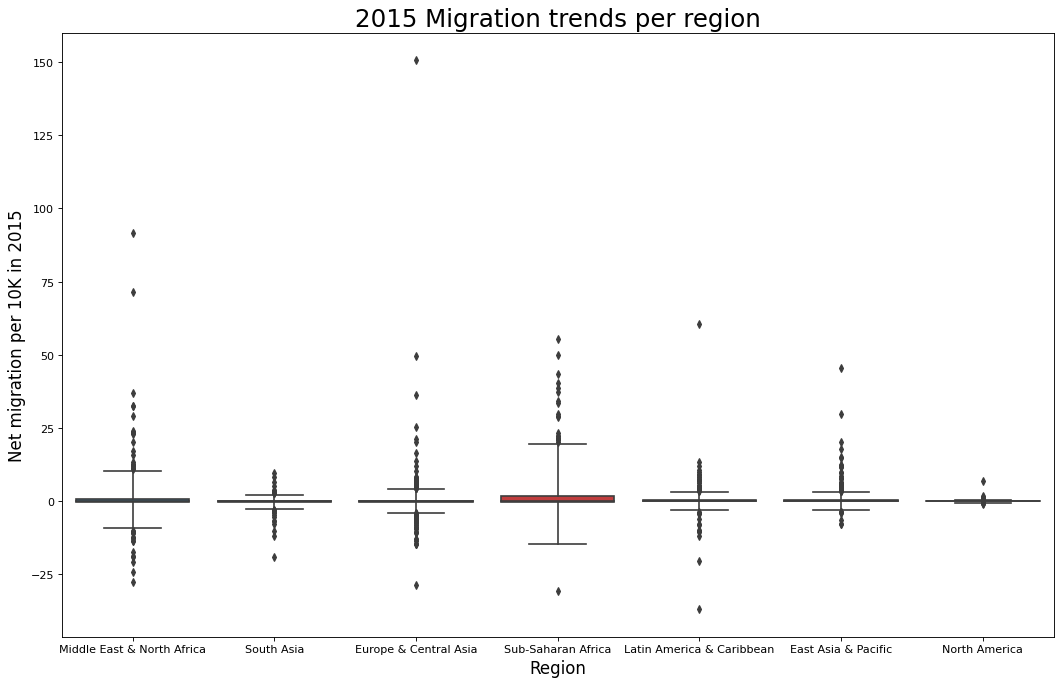

In [ ]:
# Make a box plot
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(x = 'base_country_wb_region', y = 'net_per_10K_2015', data = data, whis=10)

# Plot the y-axis on a log scale
#plt.yscale('log')


# Decoration
#plt.gca().set_xticklabels(data['base_country_wb_region'], rotation=60, horizontalalignment= 'right')
plt.xlabel('Region', fontsize = 15)
plt.ylabel('Net migration per 10K in 2015', fontsize = 15)
plt.title('2015 Migration trends per region', fontsize=22)
plt.show()

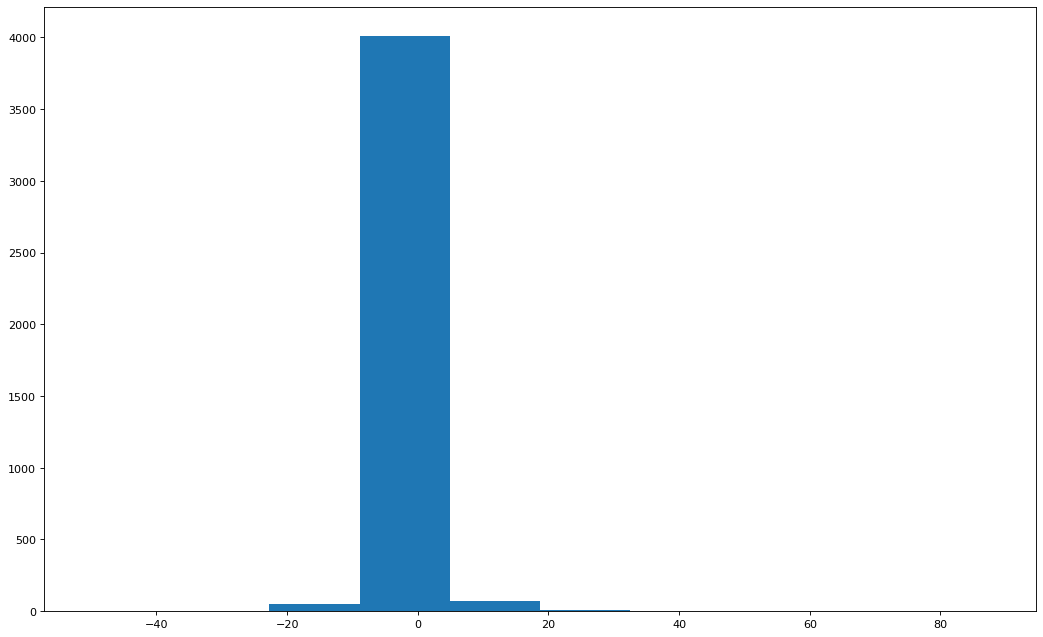

In [ ]:
plt.figure(figsize=(16,10), dpi= 80)
plt.hist(x='net_per_10K_2019', data=data, bins=10)
#plt.xlim(-55,90)
plt.show()

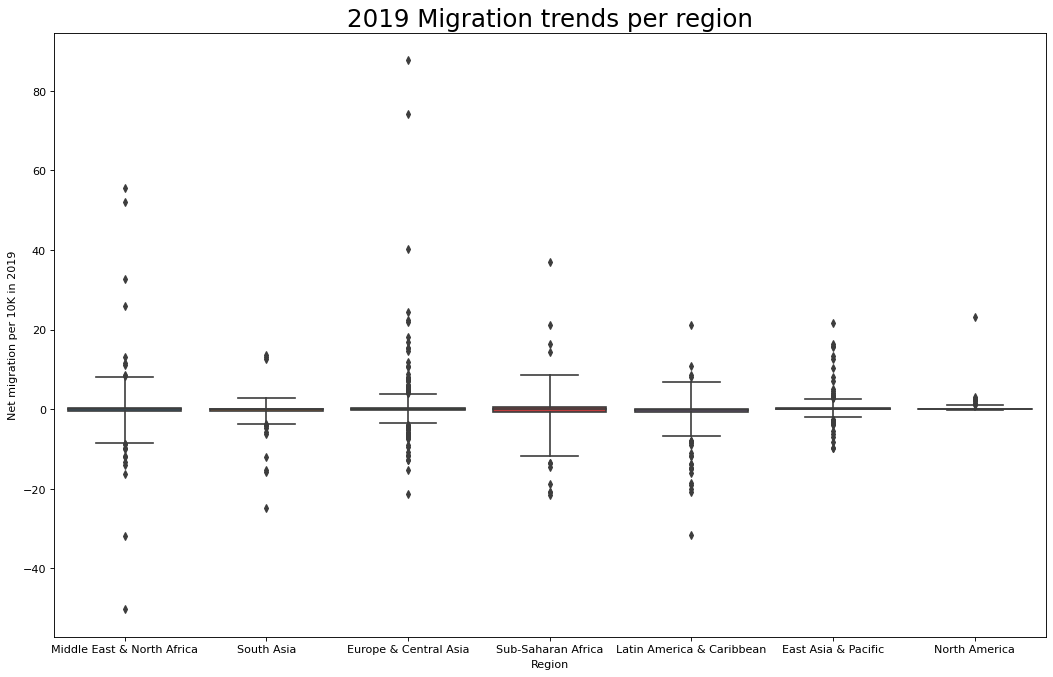

In [ ]:
# Make a box plot
plt.figure(figsize=(16,10), dpi= 80)
sns.boxplot(x = 'base_country_wb_region', y = 'net_per_10K_2019', data = data, whis=10)

# Plot the y-axis on a log scale
#plt.yscale('log')


# Remove unneeded lines and label axes
plt.xlabel('Region')
plt.ylabel('Net migration per 10K in 2019')
plt.title('2019 Migration trends per region', fontsize = 22)
plt.show()

In [ ]:
# plt.figure(figsize=(16,10), dpi= 80)
# sns.countplot(data=data,y='target_country_wb_region')
# plt.title("Migration by regions", fontsize=22)
# plt.xlabel("Count")
# plt.ylabel("Region")
# plt.show()

In [ ]:
# plt.figure(figsize=(16,10), dpi= 80)
# sns.countplot(data=data,y='base_country_wb_region')
# plt.title("Migration by regions", fontsize=22)
# plt.xlabel("Count")
# plt.ylabel("Region")
# plt.show()

In [ ]:
# plt.figure(figsize=(16,10), dpi= 80)
# sns.countplot(data=data,y='base_country_wb_income')
# plt.title("Migration by regions", fontsize=22)
# plt.xlabel("Count")
# plt.ylabel("Region")
# plt.show()

In [ ]:
# plt.figure(figsize=(16,10), dpi= 80)
# sns.countplot(data=data,y='target_country_wb_income')
# plt.title("Migration by regions", fontsize=22)
# plt.xlabel("Count")
# plt.ylabel("Region")
# plt.show()

In [ ]:
data[(data['base_country_code'] == 'ca') & (data['net_per_10K_2015'] < 0)]['net_per_10K_2015']
data[(data['base_country_code'] == 'ca') & (data['net_per_10K_2015'] > 0)]['net_per_10K_2015']

574    0.02
575    0.02
576    0.22
578    0.01
579    0.02
       ... 
682    0.17
683    0.81
684    0.09
685    0.09
686    0.02
Name: net_per_10K_2015, Length: 85, dtype: float64

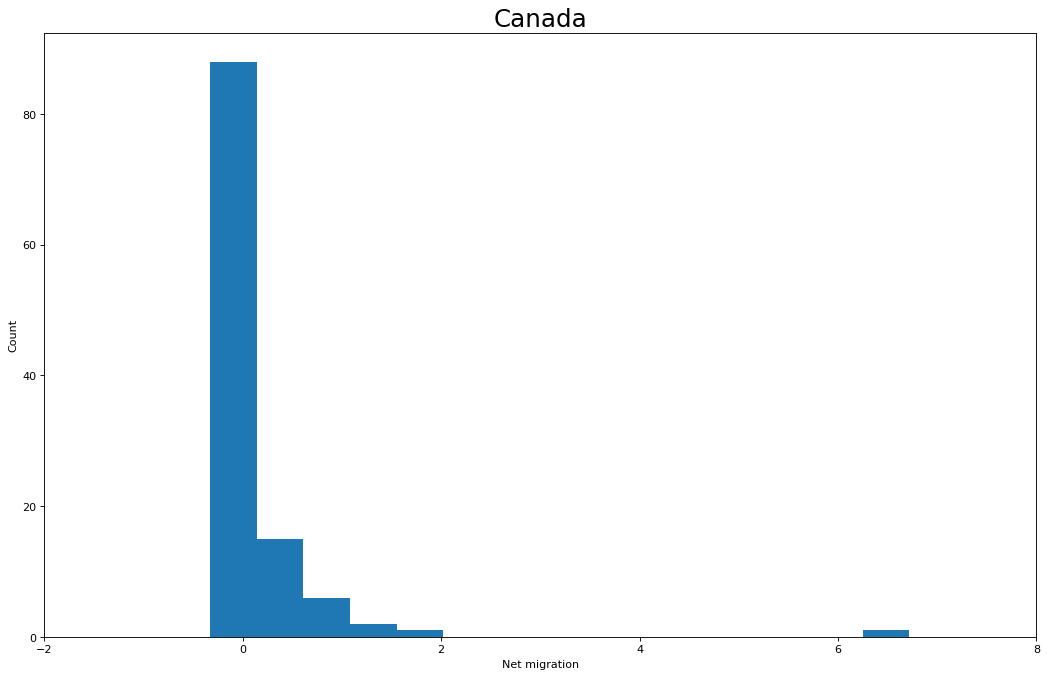

In [ ]:
can_df = data[(data['base_country_code'] == 'ca')]
can_df[['target_country_name']].groupby(['target_country_name']).count()

#df_counts = can_df.groupby(['target_country_name', 'net_per_10K_2015']).size().reset_index(name='counts')

plt.figure(figsize=(16,10), dpi= 80)
plt.hist(data=can_df,x='net_per_10K_2015', bins=15)


plt.title("Canada", fontsize=22)
plt.xlabel("Net migration")
plt.ylabel("Count")
plt.xlim(-2, 8)
plt.show()

# # Prepare data
# x_var = 'net_per_10K_2015'
# groupby_var = 'target_country_wb_region'
# df_agg = can_df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
# vals = [can_df[x_var].values.tolist() for i, df in df_agg]

# # Draw
# plt.figure(figsize=(16,12), dpi= 80)
# colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
# n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# # Decoration
# plt.legend({group:col for group, col in zip(np.unique(can_df[groupby_var]).tolist(), colors[:len(vals)])})
# plt.title(f"Stacked histogram of net migration for Canada colored by regions", fontsize=22)
# plt.xlabel(x_var)
# plt.ylabel("Frequency")
# #plt.ylim(0, 25)
# plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
# plt.show()

In [ ]:
x = data[(data['base_country_code'] == 'ca') & (data['net_per_10K_2015'] < 0)]
y = data[(data['base_country_code'] == 'ca') & (data['net_per_10K_2015'] > 0)]['net_per_10K_2015']
type(x)
x.shape

x

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
577,ca,Canada,56.130366,-106.346771,High Income,North America,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01,0.00,0.00,0.01,0.00
580,ca,Canada,56.130366,-106.346771,High Income,North America,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-0.09,-0.08,0.09,0.18,-0.06
581,ca,Canada,56.130366,-106.346771,High Income,North America,at,Austria,47.516231,14.550072,High Income,Europe & Central Asia,-0.04,0.00,-0.01,-0.01,0.00
589,ca,Canada,56.130366,-106.346771,High Income,North America,bo,Bolivia,-16.290154,-63.588653,Lower Middle Income,Latin America & Caribbean,-0.01,0.00,0.01,0.01,0.01
592,ca,Canada,56.130366,-106.346771,High Income,North America,bf,Burkina Faso,12.238333,-1.561593,Low Income,Sub-Saharan Africa,-0.02,0.00,0.02,0.02,0.03
593,ca,Canada,56.130366,-106.346771,High Income,North America,kh,Cambodia,12.565679,104.990963,Lower Middle Income,East Asia & Pacific,-0.01,-0.02,0.00,0.01,0.00
595,ca,Canada,56.130366,-106.346771,High Income,North America,cl,Chile,-35.675147,-71.542969,High Income,Latin America & Caribbean,-0.01,0.13,0.12,0.10,0.12
599,ca,Canada,56.130366,-106.346771,High Income,North America,cr,Costa Rica,9.748917,-83.753428,Upper Middle Income,Latin America & Caribbean,-0.01,0.02,0.02,0.03,0.05
605,ca,Canada,56.130366,-106.346771,High Income,North America,dk,Denmark,56.263920,9.501785,High Income,Europe & Central Asia,-0.02,0.00,0.00,0.01,0.00
607,ca,Canada,56.130366,-106.346771,High Income,North America,ec,Ecuador,-1.831239,-78.183406,Upper Middle Income,Latin America & Caribbean,-0.04,0.00,0.03,0.07,0.11


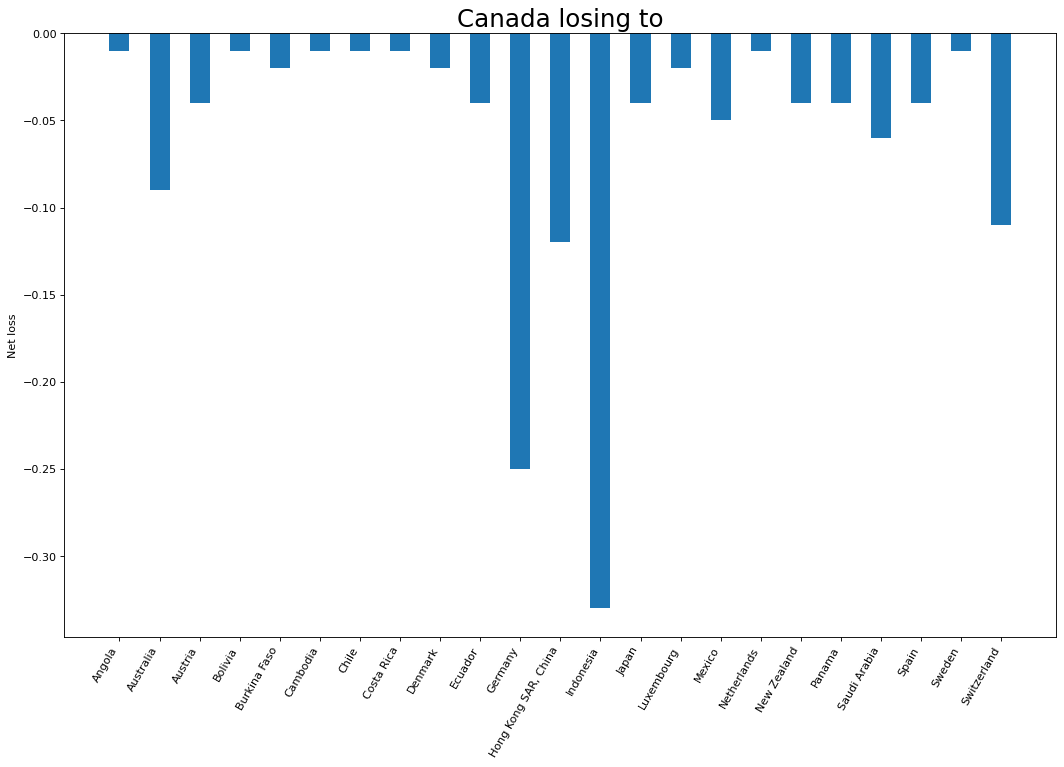

In [ ]:
#Canada losing to countries
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(x['target_country_name'], x['net_per_10K_2015'], width=.5)


#Decoration
plt.gca().set_xticklabels(x['target_country_name'], rotation=60, horizontalalignment= 'right')
plt.title("Canada losing to", fontsize=22)
plt.ylabel('Net loss')
#plt.ylim(0, 45)
plt.show()

In [ ]:
cntry_loss_2015 = data[data['net_per_10K_2015'] < 0].iloc[:,0:13]
cntry_loss_2015.head(10)

,base_country_code,base_country_name,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015
2,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ao,Angola,-11.202692,17.873887,Lower Middle Income,Sub-Saharan Africa,-0.01
5,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,au,Australia,-25.274398,133.775136,High Income,East Asia & Pacific,-1.06
9,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,bd,Bangladesh,23.684994,90.356331,Lower Middle Income,South Asia,-0.21
15,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ca,Canada,56.130366,-106.346771,High Income,North America,-2.96
35,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,ir,"Iran, Islamic Rep.",32.427908,53.688046,Upper Middle Income,Middle East & North Africa,-0.18
36,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,iq,Iraq,33.223191,43.679291,Upper Middle Income,Middle East & North Africa,-0.20
54,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,mm,Myanmar,21.913965,95.956223,Lower Middle Income,East Asia & Pacific,-0.22
57,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,nz,New Zealand,-40.900557,174.885971,High Income,East Asia & Pacific,-0.25
89,ae,United Arab Emirates,23.424076,53.847818,High Income,Middle East & North Africa,vn,Vietnam,14.058324,108.277199,Lower Middle Income,East Asia & Pacific,-0.06
95,af,Afghanistan,33.939110,67.709953,Low Income,South Asia,ca,Canada,56.130366,-106.346771,High Income,North America,-1.01


In [ ]:
cntry_gain_2015 = data[data['net_per_10K_2015'] > 0]
cntry_gain_2015
cntry_gain_2015[['base_country_name']].groupby(['base_country_name']).count()

""
base_country_name
Afghanistan
Albania
Algeria
Angola
Argentina
...
Vietnam
West Bank and Gaza
"Yemen, Rep."


In [ ]:
cntry_loss_2016 = data[data['net_per_10K_2016'] < 0]
cntry_loss_2016.head(10)
cntry_loss_2016.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Albania,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Algeria,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Angola,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Argentina,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
West Bank and Gaza,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
"Yemen, Rep.",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
cntry_gain_2016 = data[data['net_per_10K_2016'] > 0]
cntry_gain_2016
cntry_gain_2016.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
Albania,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Algeria,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Angola,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Argentina,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
West Bank and Gaza,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Yemen, Rep.",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
cntry_loss_2017 = data[data['net_per_10K_2017'] < 0]
cntry_loss_2017
cntry_loss_2017.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
Albania,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Algeria,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Angola,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Argentina,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
West Bank and Gaza,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
"Yemen, Rep.",6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [ ]:
cntry_gain_2017 = data[data['net_per_10K_2017'] > 0]
cntry_gain_2017
cntry_gain_2017.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Albania,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Algeria,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Angola,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Argentina,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Vietnam,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
West Bank and Gaza,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
cntry_loss_2018 = data[data['net_per_10K_2018'] < 0]
cntry_loss_2018
cntry_loss_2018.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Albania,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Algeria,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Angola,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Argentina,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
West Bank and Gaza,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
"Yemen, Rep.",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
cntry_gain_2018 = data[data['net_per_10K_2018'] > 0]
cntry_gain_2018
cntry_gain_2018.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Albania,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Algeria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Angola,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
Argentina,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
West Bank and Gaza,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Yemen, Rep.",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
cntry_loss_2019 = data[data['net_per_10K_2019'] < 0]
cntry_loss_2019
cntry_loss_2019.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Albania,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Algeria,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
Angola,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Argentina,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
West Bank and Gaza,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
"Yemen, Rep.",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
cntry_gain_2019 = data[data['net_per_10K_2019'] > 0]
cntry_gain_2019
cntry_gain_2019.groupby(['base_country_name']).count()

,base_country_code,base_lat,base_long,base_country_wb_income,base_country_wb_region,target_country_code,target_country_name,target_lat,target_long,target_country_wb_income,target_country_wb_region,net_per_10K_2015,net_per_10K_2016,net_per_10K_2017,net_per_10K_2018,net_per_10K_2019
base_country_name,,,,,,,,,,,,,,,,
Afghanistan,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
Albania,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Algeria,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Angola,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Argentina,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
West Bank and Gaza,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Yemen, Rep.",3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
